<a href="https://colab.research.google.com/github/DaonWoori/AIB-Project/blob/main/N331a_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *AIB / SECTION 3 / SPRINT 3 / Assignment 1*
# Convolutional Neural Networks (CNNs)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Assignment 1

Sobel Filter를 이용해 실제 Convolution(합성곱) 연산이 일어날 때, 이미지가 어떻게 변화하는지 시각화해보겠습니다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### 이미지 선정
이미지는 원하시는 아무 이미지를 업로드해서 진행해주세요

In [ ]:
from google.colab import files
lena_img = files.upload()

Saving lena.jpg to lena.jpg


3 채널의 컬러 이미지를 gray scale로 변형하여 사용하겠습니다

In [ ]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

Color Img Shape :  (512, 512, 3)
GrayScale Img Shape : (512, 512)


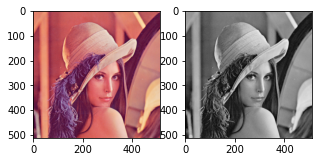

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(5, 10))

img = plt.imread('lena.jpg')
gray_img = rgb2gray(img)
print("Color Img Shape : ", img.shape)
print("GrayScale Img Shape :", gray_img.shape)
axes[0].imshow(img)
axes[1].imshow(gray_img, 'gray')

수직선과 수평선을 detect하는 Sobel Filter를 이용해 합성곱 연산을 진행하겠습니다

In [ ]:
sobel_vertical = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_horizontal = np.array([[1, 2, 1],
                             [0, 0, 0],

                             [-1, -2, -1]])

### 문제 1-1
다음은 Convolution 연산을 진행하는 함수입니다. 각각의 빈칸을 채워주세요
1. 빈칸 A, B : 컨볼루션 연산의 최종 output의 height, width를 구해주세요
2. 빈칸 C, D: val_H, val_W는 filter가 최대한으로 갈 수 있는 index입니다.
3. 빈칸 E : filter와 image 간 convolution 연산을 진행해주세요
  - TIP : filter * img 형태로 원소별 곱셈을 진행하고, numpy에서 제공하는 sum 메소드를 사용할 수 있습니다.

In [ ]:
def convolve2D(image, filter, padding=0, strides=1):
  filter_H, filter_W = filter.shape[0], filter.shape[1]
  img_H, img_W = image.shape[0], image.shape[1]

  # Convolution 연산의 출력값인 특성맵 shape
  output_H = int((img_H - filter_H + 2 * padding) / strides) + 1
  output_W = int((img_W - filter_W + 2 * padding) / strides) + 1
  output = np.zeros((output_H, output_W))

  # Padding 적용하기
  if padding != 0:
    padded_img = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
    padded_img[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
  else:
    padded_img = image

  ### 변경 ###
  padded_img_H, padded_img_W = padded_img.shape[0], padded_img.shape[1]

  val_H = padded_img_H - (filter_H - 1)
  val_W = padded_img_W - (filter_W - 1)

  for h in range(0, val_H, strides):
    for w in range(0, val_W, strides):
      output[h, w] = (filter * padded_img[h:h+filter_H, w:w+filter_W]).sum()

  return output

Text(0.5, 1.0, 'Horizontal Sobel Filter')

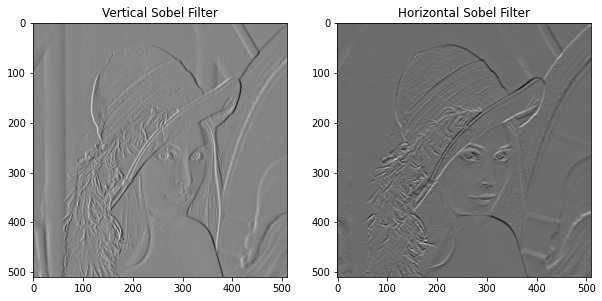

In [ ]:
vertical_output = convolve2D(gray_img, sobel_vertical)
horizontal_output = convolve2D(gray_img, sobel_horizontal)

fig, axes = plt.subplots(1, 2, figsize=(10, 20))

axes[0].imshow(vertical_output, 'gray')
axes[0].set_title('Vertical Sobel Filter')
axes[1].imshow(horizontal_output, 'gray')
axes[1].set_title('Horizontal Sobel Filter')

### 문제 1-2
빈칸 A에서 max pooling을 진행해주세요
  - TIP : numpy에서는 max 값을 구해주는 np.max가 존재합니다

In [ ]:
def maxPooling2D(image, pool_size=2, strides=2):
  img_H, img_W = image.shape[0], image.shape[1]
  valid_H, valid_W = img_H - (pool_size - 1), img_W - (pool_size - 1)
  
  pooled = []
  for h in range(0, valid_H, strides):
    pooled_ = []
    for w in range(0, valid_W, strides):
      pooled_.append(np.max(image[h:h+pool_size, w:w+pool_size]))
    pooled.append(pooled_)

  return pooled

Text(0.5, 1.0, 'Horizontal Sobel Filter After MaxPooling')

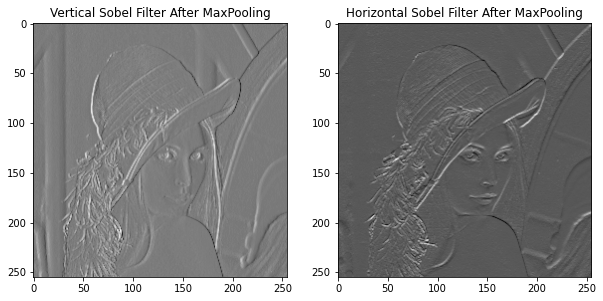

In [ ]:
vertical_maxpool_output = maxPooling2D(vertical_output)
horizontal_maxpool_output = maxPooling2D(horizontal_output)

fig, axes = plt.subplots(1, 2, figsize=(10, 20))

axes[0].imshow(vertical_maxpool_output, 'gray')
axes[0].set_title('Vertical Sobel Filter After MaxPooling')
axes[1].imshow(horizontal_maxpool_output, 'gray')
axes[1].set_title('Horizontal Sobel Filter After MaxPooling')

## Assignment 2

케라스를 이용한 바이너리 이미지 분류 모델에 3가지 CNN 모델을 적용하여 보는 과제입니다. <br/>

- [데이터 다운로드](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/mountainForest.zip)

산의 이미지(./data/mountin/*)와 숲의 이미지(./data/forest/*)를 분류하는 문제입니다. <br/>
산을 Positive (1)로, 숲 이미지를 Negative(0)로 레이블링 하여줍니다.

클래스당 약 350개의 이미지로 이루어져 있는데요.<br/>
표본이 작다는 점을 감안하면 현실적으로 어려운 문제입니다.

하지만 이번 과제에서는 해당 데이터에 여러 가지 모델을 적용해보는는 것에 중점을 두어 봅시다. <br/>
과제를 통해 이미지 분류에 적용할 수 있는 여러 모델을 알아보고 서로를 비교하는 데 익숙해져 보면 좋겠죠?

# Code

## Part 1 : Pre-trained Model



Keras에서 제공하는 pre-trained 모델인 ResNet50을 불러와서 사용해봅니다. [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1)은 50 개의 layer를 가진  CNN기반의 모델입니다. <br/>
이미지를 [1000 개의 클래스로](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt)를 분류하는 모델인데요. 우리가 풀어야 할 과제는 2가지 이므로 마지막 출력단을 변경해서 사용해 볼 수 있습니다.


`ResNet50`을 불러올 때, **`include_top=False`** 로 하면, 기존 1000가지 클래스로의 분류 문제를 풀 수 있는 ResNet 모델에서 Fully Connected layer 부분을 제거해주는 역할을 합니다.

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D()
from tensorflow.keras.models import Model

resnet = ResNet50(weights='imagenet', include_top=False)
```

아래 부분은 ResNet50 레이어들의 파라미터를 학습하지 않도록 설정합니다. <br/>
이렇게 설정된 매개 변수는 역전파를 통해 오차 정보가 전파 되더라도 파라미터가 업데이트 되지 않습니다.

```python
for layer in resnet.layers:
    layer.trainable = False
```

모델에 추가로 **`Fully-conneted layer(Dense)`** 를 추가해야 합니다. <br/>
사전 학습 모델을 불러오면서 최상위 레이어인 **`Fully-conneted layer`** 를 제거했기 때문이지요.

새로 추가하는 **`Fully-conneted layer`** 에서는 목적인 이진 분류에 맞게 출력층을 설계하여 주어야 합니다. <br/> **`GlobalAveragePooling2D`** 레이어는 마지막 컨벌루션 레이어 출력(2 차원) 각각의 평균을 취해주어 **`Dense`** 층에 들어갈 수 있도록 해줍니다.

```python
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # 출력층을 설계합니다.
model = Model(resnet.input, predictions)
```

### Load in Data

[Keras ImageDataGenerator](https://keras.io/api/preprocessing/image/) 를 참고하여 데이터를 불러옵니다. <br/>
위 링크뿐만 아니라 구글링을 통해 ImageDataGenerator 라이브러리에 대한 여러 예제를 조사하고 참고해보세요. 

Notebook을 여러분의 Google Drive에 Mount 한 후에 이미지를 불러오도록 합니다.

### Instatiate Model

In [22]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/mountainForest/mountainForest/"

In [15]:
train_ds = image_dataset_from_directory(
    path + 'train/',
    batch_size = 32
)

Found 533 files belonging to 2 classes.


In [5]:
val_ds = image_dataset_from_directory(
    path + 'validation/',
    batch_size = 32
)

Found 195 files belonging to 2 classes.


In [11]:
# class_names
class_names = train_ds.class_names
print(class_names)

['forest', 'mountain']


tf.Tensor([0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1], shape=(32,), dtype=int32)


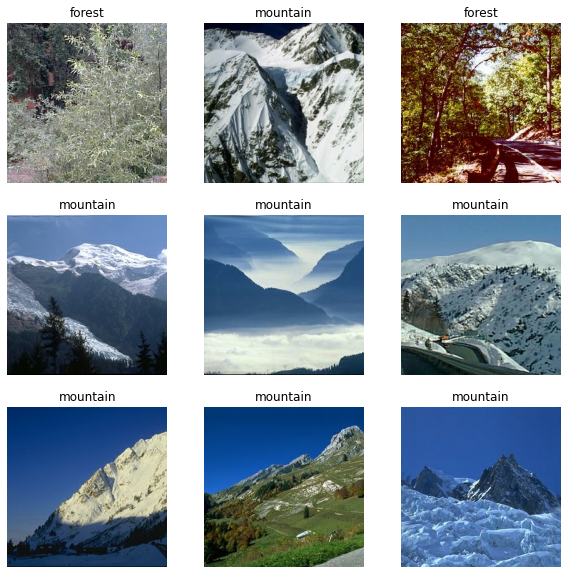

In [17]:
# 데이터 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [23]:
resnet = ResNet50(weights='imagenet', include_top=False)

In [24]:
for layer in resnet.layers:
    layer.trainable = False

In [25]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # 출력층을 설계합니다.
model = Model(resnet.input, predictions)

In [ ]:
model.summary()

In [27]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

### Fit Model

In [28]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
17/17 [==============================] - 243s 14s/step - loss: 0.2184 - accuracy: 0.9156 - val_loss: 0.0174 - val_accuracy: 0.9949
Epoch 2/5
17/17 [==============================] - 226s 14s/step - loss: 0.0245 - accuracy: 0.9906 - val_loss: 0.0815 - val_accuracy: 0.9795
Epoch 3/5
17/17 [==============================] - 225s 14s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0229 - val_accuracy: 0.9897
Epoch 4/5
17/17 [==============================] - 197s 12s/step - loss: 0.0029 - accuracy: 0.9981 - val_loss: 0.0604 - val_accuracy: 0.9846
Epoch 5/5
17/17 [==============================] - 228s 14s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 0.9897


In [41]:
model = Sequential()
model.add(Rescaling(1./255))
model.add(resnet) 
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [42]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [43]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
17/17 [==============================] - 236s 14s/step - loss: 0.7271 - accuracy: 0.5272 - val_loss: 0.6282 - val_accuracy: 0.6718
Epoch 2/5
17/17 [==============================] - 224s 13s/step - loss: 0.6425 - accuracy: 0.6248 - val_loss: 1.0380 - val_accuracy: 0.3436
Epoch 3/5
17/17 [==============================] - 224s 13s/step - loss: 0.6760 - accuracy: 0.5872 - val_loss: 0.6011 - val_accuracy: 0.6667
Epoch 4/5
17/17 [==============================] - 236s 14s/step - loss: 0.6356 - accuracy: 0.6041 - val_loss: 0.6910 - val_accuracy: 0.4923
Epoch 5/5
17/17 [==============================] - 200s 12s/step - loss: 0.5656 - accuracy: 0.7054 - val_loss: 0.5168 - val_accuracy: 0.8000


## Part 2 : Custom CNN Model




이 단계에서는 Keras를 사용하여 자신 만의 CNN을 작성하고 훈련합니다. <br/>
네트워크에 적어도 하나의 Conv 레이어와 pooling 레이어가있는 아키텍처를 만들어 사용해 보세요. <br/> 아래는 여러분이 참고할 수 있도록 표시한 결과이며 여러분의 마음대로 설계하여도 됩니다.

### Make a Custom Model

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Rescaling

In [34]:
model = Sequential()
model.add(Rescaling(1./255))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 215, 215, 32)      9632      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 64)          102464    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

### Compile Model

In [35]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

### Fit Model




In [37]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
17/17 [==============================] - 127s 4s/step - loss: 0.6634 - accuracy: 0.6773 - val_loss: 0.2886 - val_accuracy: 0.8615
Epoch 2/5
17/17 [==============================] - 60s 3s/step - loss: 0.2602 - accuracy: 0.9006 - val_loss: 0.1945 - val_accuracy: 0.9333
Epoch 3/5
17/17 [==============================] - 61s 4s/step - loss: 0.1670 - accuracy: 0.9325 - val_loss: 0.3004 - val_accuracy: 0.8667
Epoch 4/5
17/17 [==============================] - 67s 4s/step - loss: 0.1544 - accuracy: 0.9343 - val_loss: 0.3034 - val_accuracy: 0.8615
Epoch 5/5
17/17 [==============================] - 61s 3s/step - loss: 0.1692 - accuracy: 0.9325 - val_loss: 0.1827 - val_accuracy: 0.9282


imagedatageberator

- 이미지를 불러오는 것뿐만 아니라, 이미지 증강도 한꺼번에 적용 가능
- train에서만 이미지 증강 적용, validation, test는 이미지 증강 적용 x
- 굳이 original도 만들어놓은 건 증강하기 전과 후를 비교하기 위해
- 라벨링은 폴더의 순서에 따라 0, 1, ...으로 자동 매칭
- 모든 걸 증강시키진 않음. 랜덤으로 적용
=> 불러오면서 편하게 적용할 수 있지만, 제어할 순 없음

- 레퍼런스 코드는 텐서플로로 적용하는 방법도 있음

flow_from_directory를 해줘야지 학습을 할 수 있음